# Signal Processing

## Definition of a Signal

A **signal** is a function of an independent variable such as time, distance, position, or temperature.
Some examples of biomedical signals are electrocardiograms (ECG), electroencephalograms (EEG), magnetoencephalograms (MEG), etc.


There are many different ways signals data may manifest:
* **Continuous**: the domain (X-axis, time) is a continuum (that is, an infinitely uncountable set)
* **Discrete**: the domain (X-axis, time) is discrete
* **Analog**: the amplitude (Y-axis) is continuous
* **Digital**: the amplitude (Y-axis) is discrete

<h3> <center> Examples of Continuous, Discrete and Digital Signals </center> </h3>

![signals.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/signals.png)

## Definition of Frequency 

Frequency is the number of occurrences of a repeating event per unit of time.
The SI (International System of Units) unit of frequency is the hertz (symbol **Hz**, 1 Hz = 1 / second)

## Definition of Amplitude

Amplitude is half the distance between the minimum and maximum values of the range of a periodic function with a bounded range.

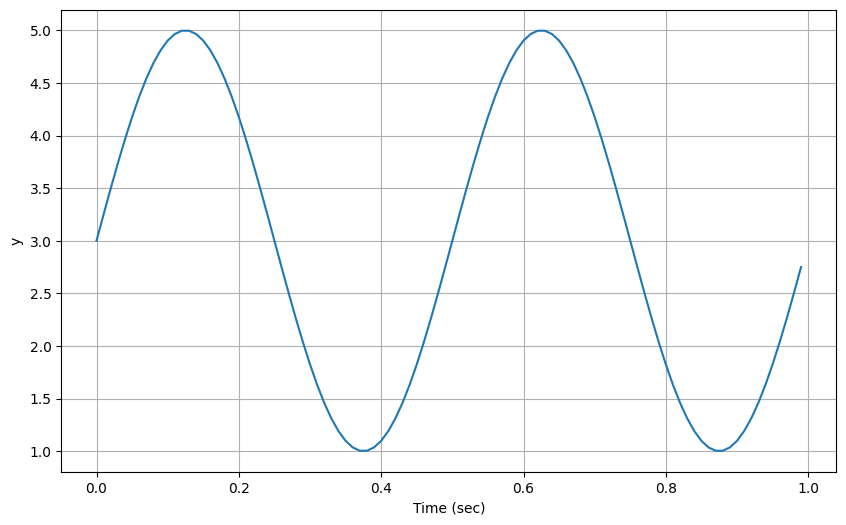

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

n_sec = 1                         # number of seconds to plot
n_points = 100                    # number of points per second
f = 2                             # oscillations per second

t = np.arange(n_sec*n_points)/n_points    # time axis
y = 3+2*np.sin(2*np.pi*f*t)         # sinusoid

# PLOT
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()

**Question**

What are the frequency and amplitude of the time signal above?

> Answer: 

## Definition of Signal Processing

Signal processing usually refers to:
- Signal generation
- Modifying signals
- Extracting information from signals

### Sampling, Sampling Rate and Sampling Theorem

Sampling is the process of converting a **continuous** signal to a **discrete** one.
- **Sampling rate**, usually denoted by $f_s$, is the number of samples *collected* per second from a continuous signal
- Sampling rate is given in the unit of hertz

#### Nyquist-Shannon Sampling Theorem:
> **"If a function x(t) contains no frequencies higher than $B$ hertz, it is completely determined by giving its ordinates (y-coordinates) at a series of points spaced less than $1/(2B)$ seconds apart."**
> In other words, we must sample at a minimum of $2B$ Hz (**Nyquist frequency/rate**) to capture the entire signal.

- Fundamental bridge between continuous time signals and discrete time signals
- Establishes a sufficient condition for a sample rate that permits a discrete sequence of samples to capture all the information from a continuous time signal of finite bandwidth
- Example: Consider the human hearing sense. The human hearing range is about from **20 Hz to 20 kHz**, so the sampling frequency of audio signals must be **at least 40 kHz** (twice the maximum frequency) to include all audible frequencies

<center><h3> A continuous signal sampled at different frequencies <h3>

![sampling.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/sampling.png)
</center>

(-2.0, 2.0)

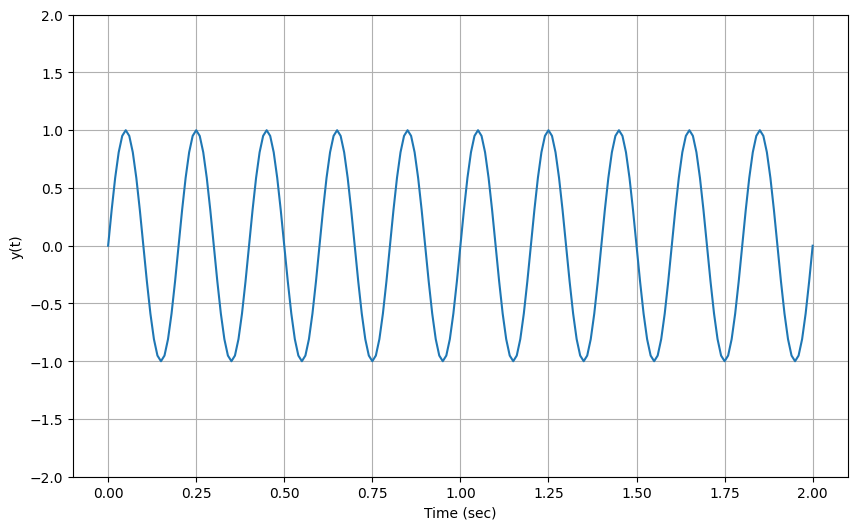

In [ ]:
t = np.linspace(0,2,201)
y = np.sin(10*np.pi*t) 

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

**Question**

What sample rate is required to completely determine the above signal? (Hint: what is the signal frequency?)

> Answer: 

## Aliasing

Aliasing arises when a signal is discretely sampled at a rate that is insuffcient to capture the changes in the signal.

### Example

Signal composed of a single sine wave at a frequency of **1 Hz**:

(-2.0, 2.0)

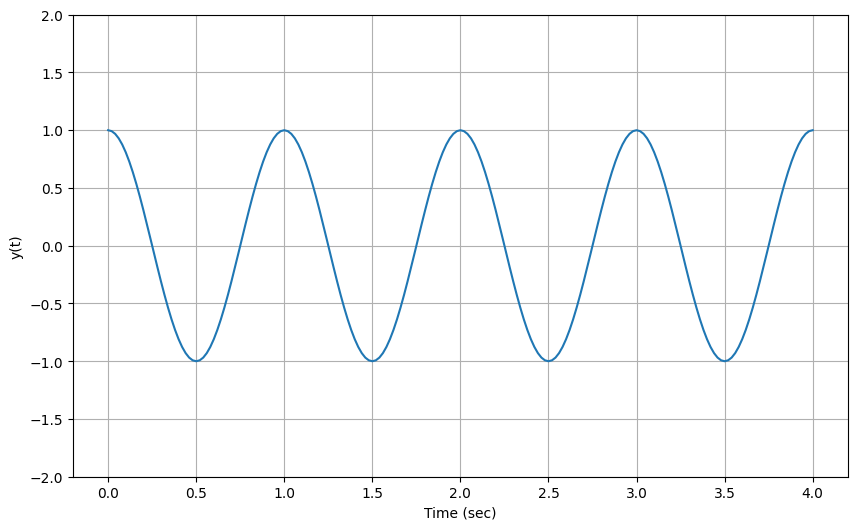

In [ ]:
t = np.linspace(0,4,201)
y = np.cos(2*np.pi*t)

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

The signal above needs to be sampled at a frequency **greater than 2 Hz** (as dictated by the Nyquist-Shannon sampling theorem) to capture each peak and trough of the signal. Why is this strict condition necessary? Lets look at a couple of examples:

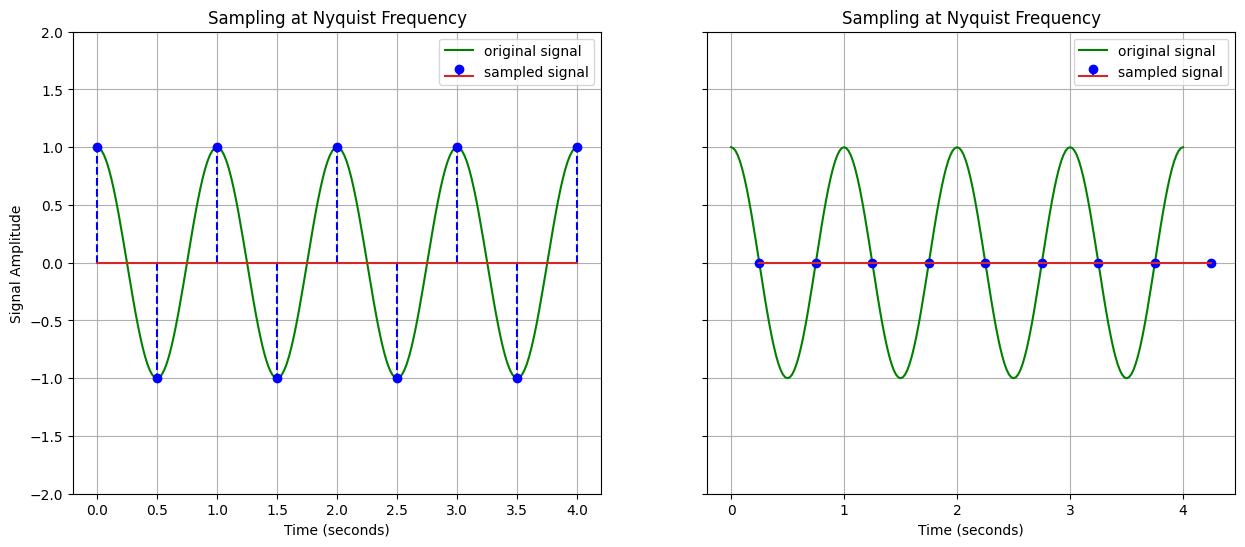

In [ ]:
n_sec = 4
fs = 2

t = np.linspace(0,n_sec,201)              # 201 points from 0 to 4
t2 = np.linspace(0,n_sec,n_sec*fs+1)
t3 = t2 + 1/fs/2 # Shift samples by half a sampling period

y = np.cos(2*np.pi*t)
y2 = np.cos(2*np.pi*t2)
y3 = np.cos(2*np.pi*t3)


figs,axs = plt.subplots(1,2,sharey = True, figsize = (15,6))

ca = axs[0]
ca.plot(t,y,'g')
ca.grid()
ca.set_xlabel('Time (seconds)')
ca.set_title('Sampling at Nyquist Frequency')
p2 = ca.stem(t2, y2,'b--')
ca.set_ylim([-2,2])
ca.legend(['original signal','sampled signal'])
ca.set_ylabel('Signal Amplitude')

ca = axs[1]
ca.plot(t,y,'g')
ca.grid()
ca.set_xlabel('Time (seconds)')
ca.set_title('Sampling at Nyquist Frequency')
p2 = ca.stem(t3, y3,'b--')
ca.set_ylim([-2,2])
ca.legend(['original signal','sampled signal'])

If we sample at a frequency higher than 2 Hz, for example at **3 Hz**, then there are more than enough samples to capture the variations in the signal.

Informally, we can say the sampling rate is fast enough that it never misses a peak or trough:

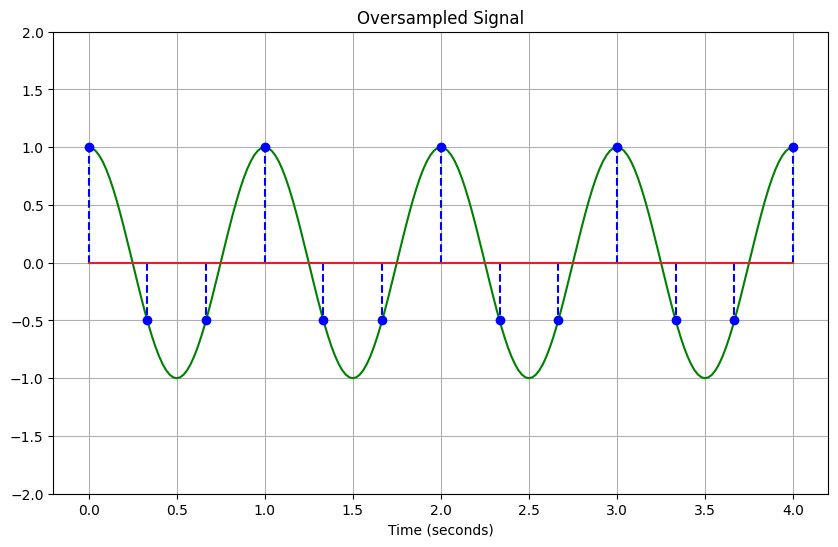

In [ ]:
n_sec = 4
fs = 3

t = np.linspace(0,n_sec,201)              
t2 = np.linspace(0,n_sec,n_sec*fs+1)

y = np.cos(2*np.pi*t)
y2 = np.cos(2*np.pi*t2)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g')
plt.grid()
plt.xlabel('Time (seconds)')
plt.title('Oversampled Signal')
plt.ylim([-2,2])
p2 = plt.stem(t2, y2,'b--')

However, if we sample at a frequency lower than 2 Hz, for example at **1.5 Hz**, then there are now not enough samples to capture all the peaks and troughs in the signal:

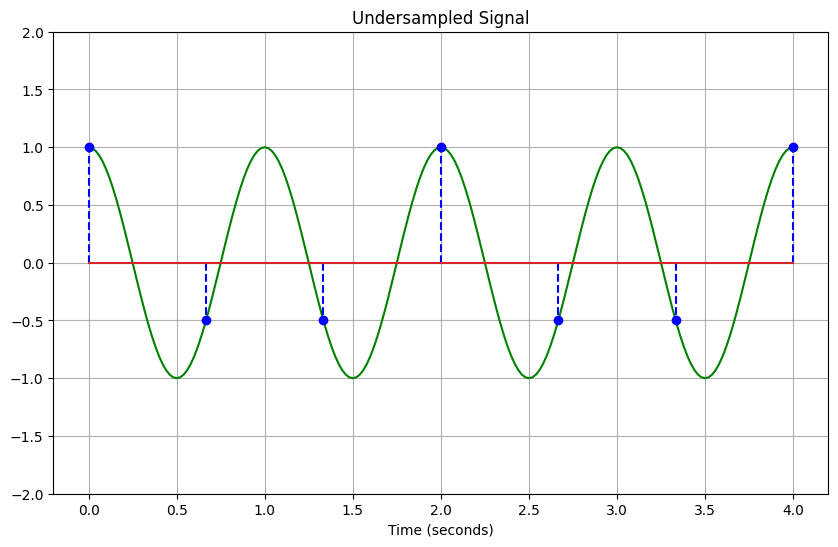

In [ ]:
n_sec = 4.
fs = 1.5

t = np.linspace(0,n_sec,201)              
t2 = np.linspace(0,n_sec,int(n_sec*fs+1))

y = np.cos(2*np.pi*t)
y2 = np.cos(2*np.pi*t2)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g')
plt.xlabel('Time (seconds)')
plt.title('Undersampled Signal')
plt.ylim([-2,2])
p2 = plt.stem(t2, y2,'b--')
plt.grid()

Note here that we are not only **losing** information but also getting the **wrong** information about the signal. The person receiving these samples, without any previous knowledge of the original signal, may well be mislead into thinking that the signal has quite a different form:

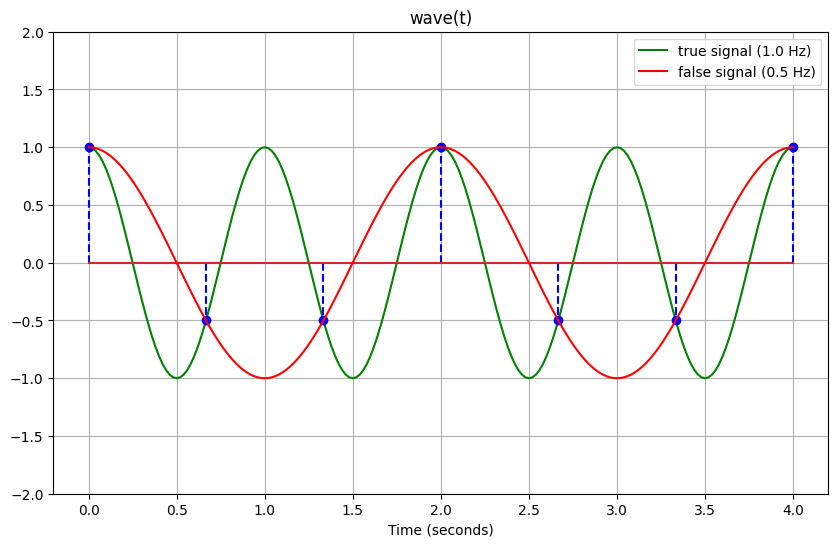

In [ ]:
fs3 = 0.5
y3 = np.cos(2*np.pi*fs3*t)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g',label='true signal (1.0 Hz)')
plt.grid()
plt.xlabel('Time (seconds)')
plt.title('wave(t)')
plt.ylim([-2,2])
p2 = plt.stem(t2, y2,'b--')
plt.plot(t,y3,'r',label='false signal (0.5 Hz)')
plt.legend()

Here is another example of two different sinusoids **aliasing** to the same digital signal:

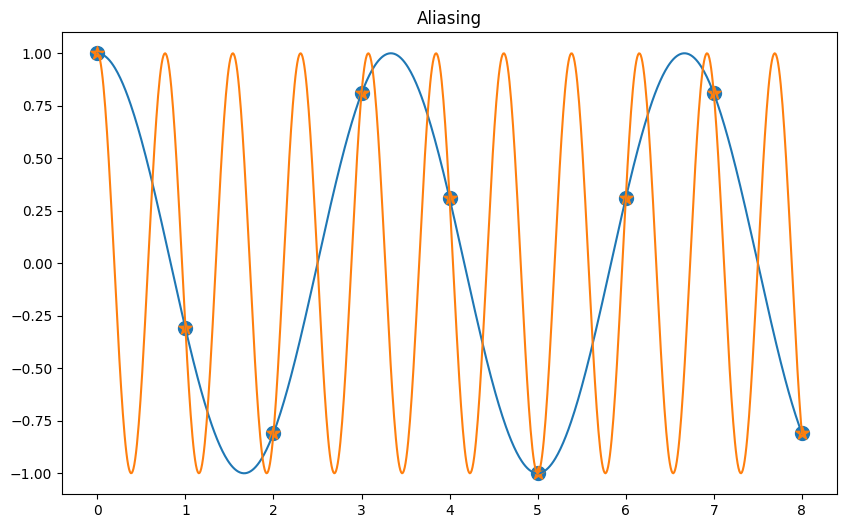

In [ ]:
t = np.linspace(0,8,801) # for continuous time signals
n = np.arange(0,9)       # discrete time 

f1 = 0.3
f2 = 1.3

omega1 = 2*np.pi*f1
omega2 = 2*np.pi*f2

y1 = np.cos(omega1*t)
y2 = np.cos(omega2*t)

plt.figure(figsize=(10,6))
plt.title("Aliasing")
plt.plot(t,y1, t,y2)
plt.scatter(n,np.cos(2*np.pi*f1*n),marker='o',s=100)
plt.scatter(n,np.cos(2*np.pi*f2*n),marker='*',s=100)

We observe many effects of aliasing in real world applications:
- In movies because continuously varying images are being discretely sampled
- In images due to improper subsampling
- In music, etc. ...

Here's an example: **Electricity consumption** sampled poorly
- Different sampling makes for different conclusions

![aliasing.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/aliasing.png)

In conclusion:

![batman_nyquist.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/batman_nyquist.png)

## Digital Signals
As mentioned at the top of this notebook, signals can be discrete in the **time** dimension (we just covered this) but also in the **amplitude** dimension.

In fact, as soon as a signal is collected by a digital device (like a computer), the signal is **digital**. The frequency resolution may be very very small, but it is still finite. For example, the resolution of a floating point number depends on the [number of bits](http://cstl-csm.semo.edu/xzhang/Class%20Folder/CS280/Workbook_HTML/FLOATING_tut.htm) used to store it, as is demonstrated in the figure below.

![floating_point_arithmetic.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/floating_point_arithmetic.png)

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['class','dtype','smallest normal','smallest subnormal','exponent','mantissa'])

# Check out different float classes
for f in (np.float16, np.float32, np.float64, float):
    finfo = np.finfo(f)

    df=df.append({'class':'{}'.format(f),
                  'dtype':finfo.dtype,
                  'smallest normal':finfo.tiny, 
                  'smallest subnormal':np.nextafter(f(0), f(1)), 
                  'exponent':finfo.nexp, 
                  'mantissa':finfo.nmant},ignore_index=True)
    
df

,class,dtype,smallest normal,smallest subnormal,exponent,mantissa
0,<class 'numpy.float16'>,float16,6.103516e-05,5.960464e-08,5,10
1,<class 'numpy.float32'>,float32,1.175494e-38,1.401298e-45,8,23
2,<class 'numpy.float64'>,float64,2.225074e-308,4.940656e-324,11,52
3,<class 'float'>,float64,2.225074e-308,4.940656e-324,11,52


Let's look at how digitization can affect the quality of data we collect.

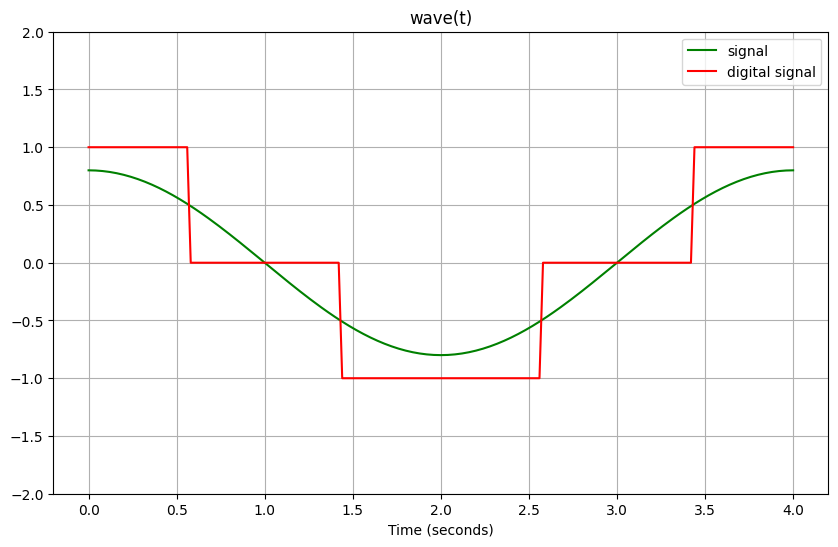

In [ ]:
n_sec = 4
fs = 10

digres = 0     # the digital resolution (number of decimal places we can store)

t = np.linspace(0,n_sec,201)

# analog(ish) signal and digital signal
y = 0.8*np.cos(0.5*np.pi*t)
y2 = np.around(0.8*np.cos(0.5*np.pi*t),digres)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g',label='signal')
plt.grid()
plt.xlabel('Time (seconds)')
plt.title('wave(t)')
plt.plot(t, y2,'r',label='digital signal')
plt.ylim([-2,2])
plt.legend()

### Digitized Newts
Let's use one of the sound files from the last notebook and see what happens to the quality of the signal when we **discretize** and **digitize** it!

In [ ]:
# Grab a sample .wav file (audio file) for this notebook
os.system('wget https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/Sounds/newt.wav')

--2023-10-14 01:13:55--  https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/Sounds/newt.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99852 (98K) [audio/wav]
Saving to: ‘newt.wav’

     0K .......... .......... .......... .......... .......... 51% 57.1M 0s
    50K .......... .......... .......... .......... .......   100% 60.3M=0.002s

2023-10-14 01:13:55 (58.6 MB/s) - ‘newt.wav’ saved [99852/99852]



0

Text(0, 0.5, 'Amplitude')

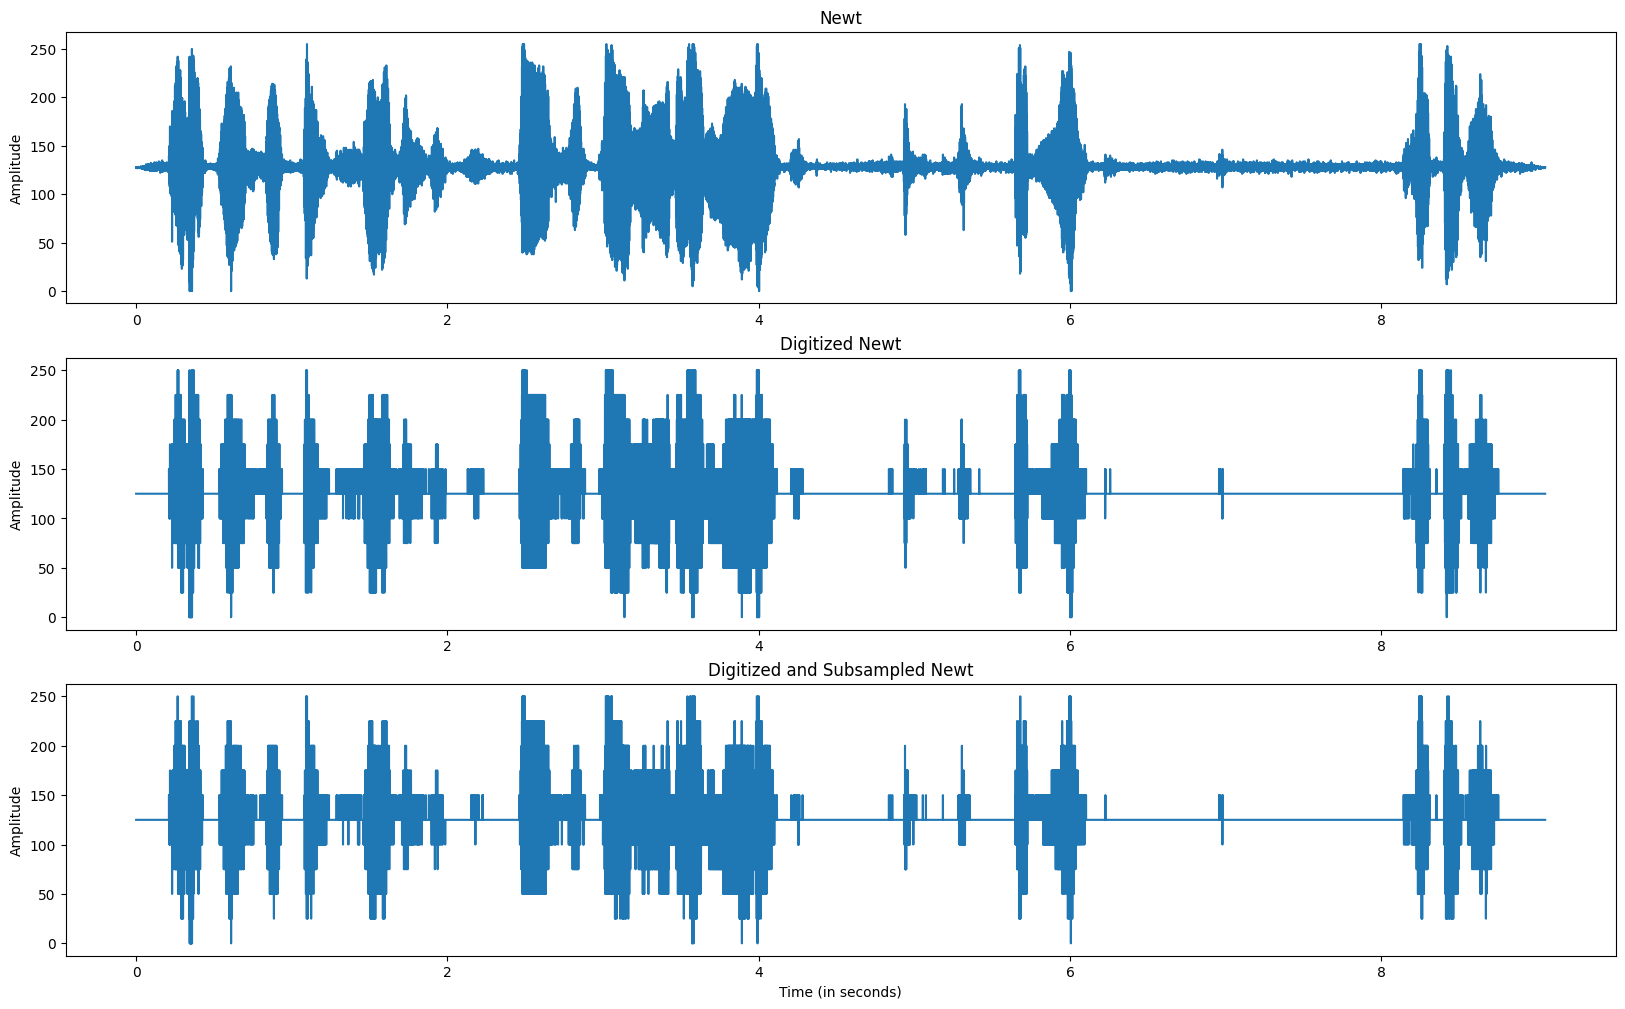

In [ ]:
import scipy.io.wavfile
from IPython.display import Audio

# Original signal
(sample_rate, input_signal) = scipy.io.wavfile.read("./newt.wav")
t = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

# Signal 2: digitize the input
amp_res = 25     # Amplitude resolution
digitized_input = np.around(input_signal/amp_res,0)*amp_res

# Signal 3: sample every N data points
subsample=3      # Sample every <subsample> points
t2 = t[::subsample]
digitized_input2 = digitized_input[::subsample]
sample_rate2 = sample_rate/subsample

# Plot
plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
plt.plot(t, input_signal)
plt.title('Newt')
plt.ylabel('Amplitude')

plt.subplot(3,1,2)
plt.plot(t, digitized_input)
plt.title('Digitized Newt')
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
plt.plot(t2, digitized_input2)
plt.title('Digitized and Subsampled Newt')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')

In [ ]:
# Original signal
Audio(data=input_signal, rate=sample_rate)

In [ ]:
# Digitized signal
Audio(data=digitized_input, rate=sample_rate)

In [ ]:
# Digitized and sub-sampled signal
Audio(data=digitized_input2, rate=sample_rate2)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2703ed7-f8b4-40f5-8dd1-77fe823e4d60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>